In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))  # Lists available GPUs


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('AIR_DATA.csv')
del df['StationId']
del df['Datetime']
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [29]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [30]:
df=df.dropna()

In [31]:
df.shape

(203693, 14)

In [32]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [33]:
df.tail()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2543904,102.80,192.38,44.95,69.05,114.03,40.23,1.06,7.53,16.70,65.42,59.69,1.84,223.0,Poor
2543905,85.50,161.35,16.15,65.22,81.32,39.08,0.79,8.60,20.47,57.14,51.31,1.41,222.0,Poor
2543906,73.75,143.65,8.40,52.65,61.08,38.53,0.66,9.82,26.58,53.71,51.38,1.25,219.0,Poor
2543907,71.50,133.38,5.60,45.03,50.62,42.62,0.55,9.57,28.28,56.80,56.27,1.21,217.0,Poor
2543908,54.47,117.12,4.20,39.00,43.17,48.02,0.62,9.20,31.63,56.04,55.58,1.12,215.0,Poor


In [34]:
x1 = df.drop(labels=['AQI_Bucket','AQI'], axis=1)
y1 = df.loc[:,'AQI_Bucket']

In [35]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({'Moderate': 88654, 'Satisfactory': 69531, 'Good': 22852, 'Poor': 11704, 'Very Poor': 9147, 'Severe': 1805})
OVER SAMPLING DATA COUNT  :  Counter({'Moderate': 88654, 'Poor': 88654, 'Very Poor': 88654, 'Satisfactory': 88654, 'Good': 88654, 'Severe': 88654})


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  425539
NUMBER OF TEST DATASET      :  106385
TOTAL NUMBER OF DATASET    :  531924


In [37]:
from sklearn.tree import ExtraTreeClassifier

In [14]:
ETC = ExtraTreeClassifier()
ETC.fit(x_train,y_train)

ExtraTreeClassifier()

In [15]:
predicted = ETC.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER :\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER :


 [[17663    13     0    54     0     0]
 [  271 12368  1085  3578    33   396]
 [    0    12 17706     6     0     7]
 [ 1294  2969   131 13258     8    71]
 [    0     0     0     0 17731     0]
 [    0     0     1     0     0 17730]]


In [17]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS : 90.66691732857076


In [18]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS : 9.333082671429242


In [19]:
from sklearn.metrics import classification_report
P = classification_report(y_test,predicted)
print("THE CLASSIFICATION REPORT OF EXTRA TREE CLASSIFIER IS :\n\n",P)

THE CLASSIFICATION REPORT OF EXTRA TREE CLASSIFIER IS :

               precision    recall  f1-score   support

        Good       0.92      1.00      0.96     17730
    Moderate       0.81      0.70      0.75     17731
        Poor       0.94      1.00      0.97     17731
Satisfactory       0.78      0.75      0.77     17731
      Severe       1.00      1.00      1.00     17731
   Very Poor       0.97      1.00      0.99     17731

    accuracy                           0.91    106385
   macro avg       0.90      0.91      0.90    106385
weighted avg       0.90      0.91      0.90    106385



THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:


[[17663    13     0    54     0     0]
 [  271 12368  1085  3578    33   396]
 [    0    12 17706     6     0     7]
 [ 1294  2969   131 13258     8    71]
 [    0     0     0     0 17731     0]
 [    0     0     1     0     0 17730]]


DISPLAY CONFUSION MATRIX : 




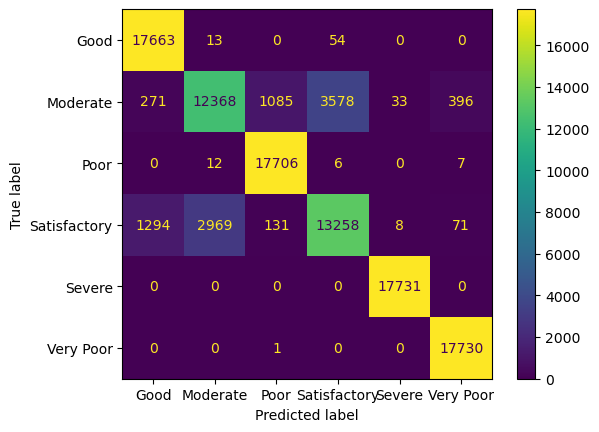

In [20]:
cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:\n\n')
print(cm)
print("\n\nDISPLAY CONFUSION MATRIX : \n\n")
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=ETC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ETC.classes_)
disp.plot()
plt.show()


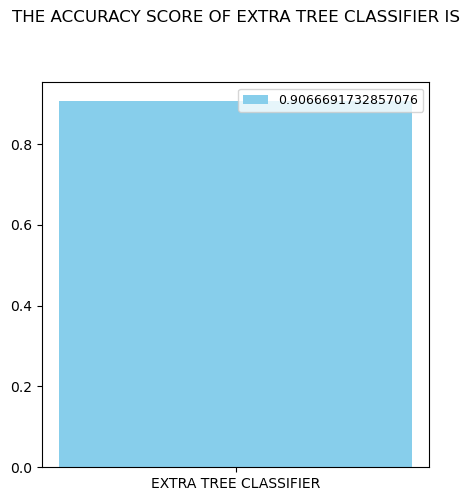

In [21]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="EXTRA TREE CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("SKYBLUE"))
    plt.title("THE ACCURACY SCORE OF EXTRA TREE CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [22]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, ETC.predict(x_train))
test_acc = accuracy_score(y_test, ETC.predict(x_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Train Accuracy: 1.0000
Test Accuracy: 0.9067


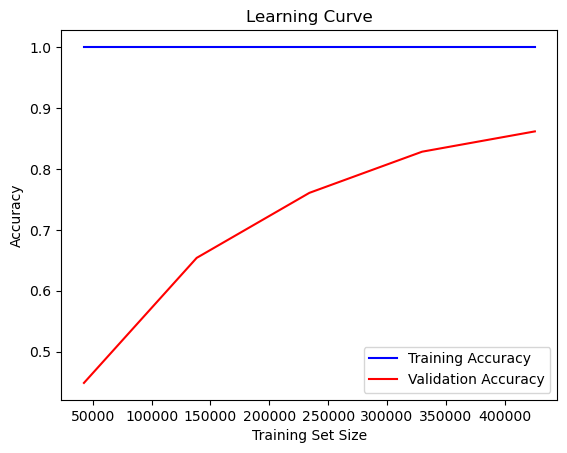

In [23]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(ETC, x, y, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="red")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ETC,x,y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-Validation Scores: [0.84035343 0.84166001 0.86204822 0.85368238 0.89307603]
Mean CV Accuracy: 0.8581640138666664


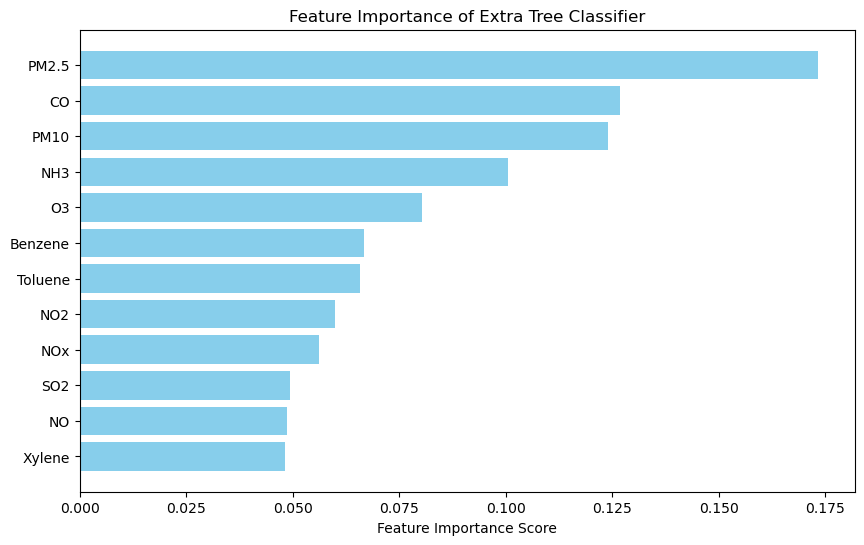

In [25]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = ETC.feature_importances_
features = x_train.columns
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], feature_importance[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance of Extra Tree Classifier")
plt.show()


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

# Split data
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# ExtraTreesClassifier with Regularization
ETC = ExtraTreesClassifier(
    n_estimators=100,            # Reduce number of trees
    max_depth=30,                # Limit tree depth
    min_samples_split=5,        # Require more samples to split nodes
    min_samples_leaf=2,          # Require more samples in leaf nodes
    max_features='sqrt',         # Limit features per split
    random_state=42
)

# Train model
ETC.fit(X_train, y_train)

# Evaluate
train_acc = ETC.score(X_train, y_train)
val_acc = ETC.score(X_val, y_val)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


Train Accuracy: 0.9618
Validation Accuracy: 0.9182


In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ETC, x, y, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy: 0.8685902849170125


In [45]:
predicted = ETC.predict(X_val)

THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:


[[3178 2769 3001 2772 2959 3051]
 [3239 2813 3016 2819 2963 2881]
 [3290 2650 2996 2790 2982 3023]
 [3221 2651 2964 2873 3031 2991]
 [3152 2682 3205 2685 2991 3016]
 [3247 2749 3048 2718 2938 3031]]


DISPLAY CONFUSION MATRIX : 




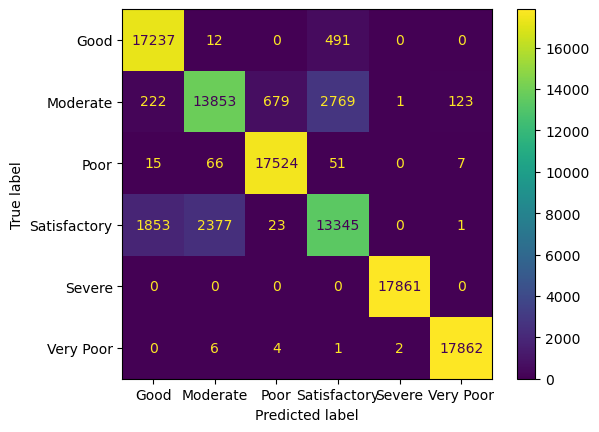

In [46]:
cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF EXTRA TREE CLASSIFIER:\n\n')
print(cm)
print("\n\nDISPLAY CONFUSION MATRIX : \n\n")
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_val, predicted, labels=ETC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ETC.classes_)
disp.plot()
plt.show()


In [48]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_val,predicted)
print("THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF EXTRA TREE CLASSIFIER IS : 8.180664567373219
